In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import nltk
from tqdm import tqdm
tqdm.pandas()

from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import re
# import emoji
import multiprocessing

from multiprocessing import Pool

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import warnings


#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')

import tensorflow as tf


In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Dropout, Dense, LayerNormalization,
                                     MultiHeadAttention, GlobalAveragePooling1D, Lambda)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
import gensim.downloader as api
import matplotlib.pyplot as plt

In [2]:
pip install tqdm

# Pre trained word2vec model with 300D

In [21]:
pip install Gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [47]:
sampled_df=pd.read_csv("preprocessed_data.csv")

In [49]:
sampled_df.head()

,Tweet,Sentiment,Cleaned_Tweet,Spell_Checked_Tweet,Negated_Tweet,Contains_Emoji
0,Ottawa Police shoot RUBBER BULLETS into crowd ...,Positive,ottawa police shoot rubber bullets into crowd ...,ottawa police shoot rubber bullets into crowd ...,ottawa police shoot rubber bullets into crowd ...,False
1,A former Mountie and member of Prime Minister ...,Positive,a former mountie and member of prime minister ...,a former mountie and member of prime minister ...,a former mountie and member of prime minister ...,False
2,@PierrePoilievre It’s already the freest count...,Positive,its already the freest country stop trying to...,its already the freest country stop trying to ...,it s already the freest country stop trying to...,False
3,@RobynUrback Ban ministers from the Very progr...,Positive,ban ministers from the very progressive freed...,ban ministers from the very progressive freedo...,ban ministers from the very progressive freedo...,False
4,Three songs have been stuck in my head the pas...,Positive,three songs have been stuck in my head the pas...,three songs have been stuck in my head the pas...,three songs have been stuck in my head the pas...,False


In [48]:
sampled_df.isnull().sum()

,0
Tweet,0
Sentiment,0
Cleaned_Tweet,2
Spell_Checked_Tweet,0
Negated_Tweet,0
Contains_Emoji,0


In [46]:
# sampled_df.to_csv("preprocessed_data.csv", index=False, encoding='utf-8')

# Data splitting

In [50]:
from sklearn.model_selection import train_test_split

# split into train (80%) and temp (20%)
train_df, temp_df = train_test_split(
    sampled_df,
    test_size=0.2,
    stratify=sampled_df["Sentiment"],
    random_state=42
)

# Split temp into validation and test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["Sentiment"],
    random_state=42
)


print(f"Train: {len(train_df)} rows")
print(f"Validation: {len(val_df)} rows")
print(f"Test: {len(test_df)} rows")


Train: 84107 rows
Validation: 10513 rows
Test: 10514 rows


In [51]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


# Label encoding Sentiment column

In [52]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the encoder on the training data and transform the 'Sentiment' column
train_df['Sentiment'] = label_encoder.fit_transform(train_df['Sentiment'])

# Apply the same transformation to the validation and test sets
val_df['Sentiment'] = label_encoder.transform(val_df['Sentiment'])
test_df['Sentiment'] = label_encoder.transform(test_df['Sentiment'])


In [53]:
# label encoding for Positive, Negative, and Neutral
print("Label Encoding Mapping:")
for label, encoding in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoding}")


Label Encoding Mapping:
Negative: 0
Neutral: 1
Positive: 2


In [54]:
test_df.head()

,Tweet,Sentiment,Cleaned_Tweet,Spell_Checked_Tweet,Negated_Tweet,Contains_Emoji
0,"@CTVNews The pigs and the so-called ""freedom"" ...",0,the pigs and the socalled freedom convoy have...,the pigs and the socalled freedom convoy have ...,the pigs and the so called freedom convoy hav...,False
1,Banana Republics all over the world are callin...,1,banana republics all over the world are callin...,banana republics all over the world are callin...,banana republics all over the world are callin...,False
2,@FringedCanuck Just because she likes the PPC?...,2,just because she likes the ppc quit dividing ...,just because she likes the ppc quit dividing c...,just because she likes the ppc quit dividin...,False
3,Grande #Djokovic 👏👏👏\n\n#TrudeauTyranny \n\n#F...,1,grande,grand,grand,False
4,@DianaGlobalNews The simple truth is that if y...,1,the simple truth is that if you support the c...,the simple truth is that if you support the co...,the simple truth is that if you support the co...,False


# Tokenization and Padding

In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer


vocab_size = 10000

# tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# fitting on train data
tokenizer.fit_on_texts(train_df["Spell_Checked_Tweet"])





In [84]:
# max length of sequences in the training dataset
# maxlen = max([len(tweet.split()) for tweet in train_df["Negated_Tweet"]])
maxlen=100

# Converting texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_df["Spell_Checked_Tweet"])
val_sequences = tokenizer.texts_to_sequences(val_df["Spell_Checked_Tweet"])
test_sequences = tokenizer.texts_to_sequences(test_df["Spell_Checked_Tweet"])

# Padding the sequences to the same length (maxlen)
train_sequences_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post', truncating='post')
val_sequences_padded = pad_sequences(val_sequences, maxlen=maxlen, padding='post', truncating='post')
test_sequences_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')

print(f"Train sequences shape: {train_sequences_padded.shape}")
print(f"Validation sequences shape: {val_sequences_padded.shape}")
print(f"Test sequences shape: {test_sequences_padded.shape}")


Train sequences shape: (84107, 100)
Validation sequences shape: (10513, 100)
Test sequences shape: (10514, 100)


# Pretrained Google news Word2Vec with 300 dimensions

In [58]:
import gensim.downloader as api

# Load pretrained Word2Vec model
w2v_model = api.load("word2vec-google-news-300")  # or use another CBOW/Skipgram model
embedding_dim = w2v_model.vector_size


In [82]:
print(f"Total words in Word2Vec model: {len(w2v_model.key_to_index)}")

Total words in Word2Vec model: 3000000


In [85]:
import numpy as np

# Define vocab size and embedding matrix
vocab_size = min(10000, len(tokenizer.word_index) + 1)
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:
        if word in w2v_model:
            embedding_matrix[idx] = w2v_model[word]
        else:
            # Random initialization for OOV words
            embedding_matrix[idx] = np.random.normal(scale=0.6, size=(embedding_dim,))


In [78]:
# oov_words = []
# for word, idx in tokenizer.word_index.items():
#     if word not in w2v_model:
#         oov_words.append(word)

# # few OOV words
# print("OOV Words (not in pretrained Word2Vec model):")
# print(oov_words[:10])


OOV Words (not in pretrained Word2Vec model):
['<OOV>', 'a', 'to', 'of', 'and', 'trudeau', 'covid', 'notis', 'gofundme', 'notwas']


In [86]:
covered = 0
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size and word in w2v_model:
        covered += 1

print(f"Coverage: {covered / vocab_size:.2%}")


Coverage: 94.79%


In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models


from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Dropout, Dense, LayerNormalization,
                                     MultiHeadAttention, GlobalAveragePooling1D, Lambda)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
import gensim.downloader as api
import matplotlib.pyplot as plt

# Define positional encoding layer
class PositionalEmbedding(layers.Layer):
    def __init__(self, vocab_size, embedding_dim, max_len, embedding_matrix):
        super().__init__()
        self.token_embed = layers.Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            trainable=False,  # Set to True if you want to finetune
        )
        self.pos_embed = layers.Embedding(input_dim=max_len, output_dim=embedding_dim)

    def call(self, x):
        maxlen = tf.shape(x)[1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_embed(positions)
        x = self.token_embed(x)
        return x + positions

# Parameters
num_classes = 3
dropout_rate = 0.1

# Model
inputs = layers.Input(shape=(maxlen,))
x = PositionalEmbedding(vocab_size, embedding_dim, maxlen, embedding_matrix)(inputs)

# Transformer block
attention_output = layers.MultiHeadAttention(num_heads=2, key_dim=embedding_dim)(x, x)
x = layers.LayerNormalization(epsilon=1e-6)(x + attention_output)
ff_output = layers.Dense(128, activation='relu')(x)
ff_output = layers.Dense(embedding_dim)(ff_output)
x = layers.LayerNormalization(epsilon=1e-6)(x + ff_output)

# Pooling + Dense
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(dropout_rate)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 100, 300)  │  3,030,000 │ input_layer_9[0]… │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 100, 300)  │    722,100 │ positional_embed… │
│ (MultiHeadAttentio… │                   │            │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 100, 300)  │          0 │ positional_embed… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 100, 300)  │        600 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 100, 128)  │     38,528 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 100, 300)  │     38,700 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 100, 300)  │          0 │ layer_normalizat… │
│                     │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 100, 300)  │        600 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 300)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 300)       │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 64)        │     19,264 │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 64)        │          0 │ dense_23[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 3)         │        195 │ dropout_23[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,849,987 (14.69 MB)

 Trainable params: 849,987 (3.24 MB)

 Non-trainable params: 3,000,000 (11.44 MB)

In [88]:
# Train the model
history = model.fit(
    train_sequences_padded,
    train_df["Sentiment"],
    validation_data=(val_sequences_padded, val_df["Sentiment"]),
    epochs=10,              # You can increase if needed
    batch_size=64,         # Try reducing if memory issues
    verbose=1
)


Epoch 1/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.5320 - loss: 0.9610 - val_accuracy: 0.6104 - val_loss: 0.8401
Epoch 2/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.6100 - loss: 0.8419 - val_accuracy: 0.6282 - val_loss: 0.8147
Epoch 3/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6252 - loss: 0.8154 - val_accuracy: 0.6195 - val_loss: 0.8219
Epoch 4/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.6408 - loss: 0.7905 - val_accuracy: 0.6384 - val_loss: 0.7951
Epoch 5/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.6432 - loss: 0.7849 - val_accuracy: 0.6548 - val_loss: 0.7710
Epoch 6/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.6539 - loss: 0.7690 - val_accuracy: 0.6573 - val_loss: 0.7635
Epoch 7/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6621 - loss: 0.7562 - val_accuracy: 0.6609 - val_loss: 0.7555
Epoch 8/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6671 -

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import numpy as np

def evaluate_model(model, data, labels, data_name="Data"):

    # Predict the labels (probabilities)
    preds = model.predict(data)

    # Get the predicted class labels
    preds_class = np.argmax(preds, axis=1)

    # Calculate Accuracy
    acc = accuracy_score(labels, preds_class)
    print(f"{data_name} Accuracy: {acc:.4f}")

    # Calculate F1 Score (Macro Average)
    f1 = f1_score(labels, preds_class, average='macro')
    print(f"{data_name} Macro F1 Score: {f1:.4f}")

    # Calculate Macro AUC Score (One-vs-Rest)
    auc_score = roc_auc_score(labels, preds, multi_class='ovr', average='macro')
    print(f"{data_name} Macro AUC Score: {auc_score:.4f}")

    # Classification Report
    print(f"{data_name} Classification Report:")
    print(classification_report(labels, preds_class))

    # Confusion Matrix
    cm = confusion_matrix(labels, preds_class)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f"{data_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve and AUC for each class
    lb = LabelBinarizer()
    labels_bin = lb.fit_transform(labels)  # One-hot encode labels

    plt.figure(figsize=(8, 6))
    for i in range(labels_bin.shape[1]):  # For each class
        fpr, tpr, _ = roc_curve(labels_bin[:, i], preds[:, i])  # Calculate ROC for each class
        auc = roc_auc_score(labels_bin[:, i], preds[:, i])  # AUC for the class
        print(f"{data_name} Class {i} AUC: {auc:.4f}")

        plt.plot(fpr, tpr, label=f'Class {i} ROC curve (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{data_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()




2629/2629 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Train Accuracy: 0.6907
Train Macro F1 Score: 0.6878
Train Macro AUC Score: 0.8629
Train Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71     27984
           1       0.75      0.56      0.64     28144
           2       0.67      0.76      0.71     27979

    accuracy                           0.69     84107
   macro avg       0.70      0.69      0.69     84107
weighted avg       0.70      0.69      0.69     84107



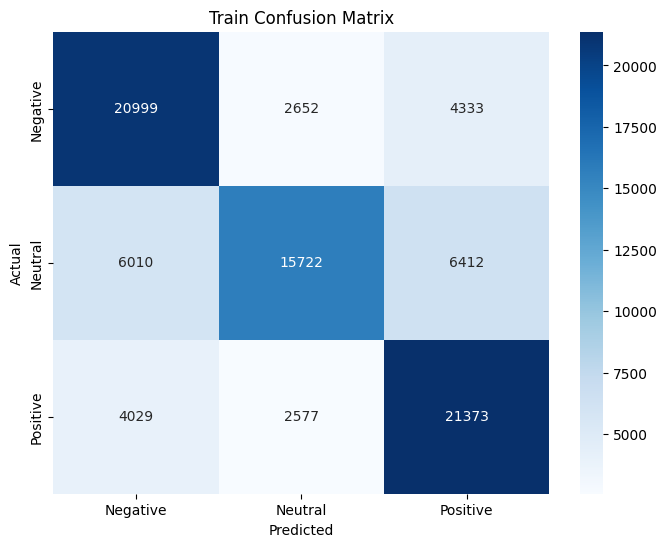

Train Class 0 AUC: 0.8821
Train Class 1 AUC: 0.8294
Train Class 2 AUC: 0.8773


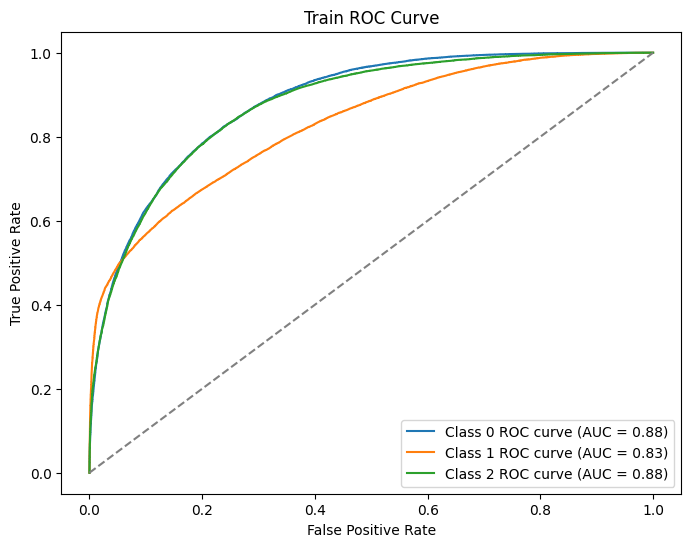

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy: 0.6705
Test Macro F1 Score: 0.6681
Test Macro AUC Score: 0.8429
Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      3498
           1       0.72      0.55      0.63      3518
           2       0.65      0.74      0.69      3498

    accuracy                           0.67     10514
   macro avg       0.68      0.67      0.67     10514
weighted avg       0.68      0.67      0.67     10514



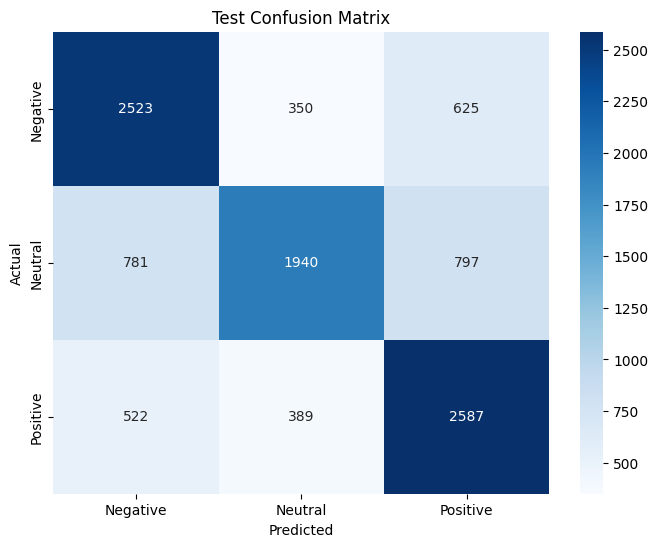

Test Class 0 AUC: 0.8614
Test Class 1 AUC: 0.8092
Test Class 2 AUC: 0.8582


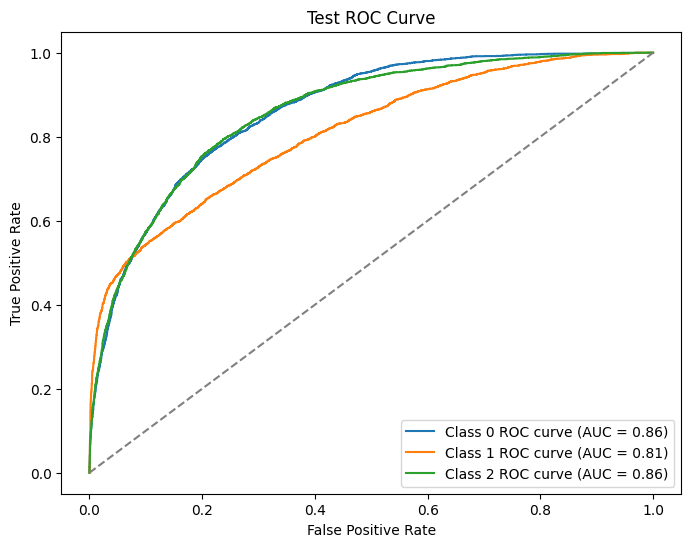

In [90]:
# Evaluation
evaluate_model(model, train_sequences_padded, train_df["Sentiment"], "Train")

evaluate_model(model, test_sequences_padded, test_df["Sentiment"], "Test")


# For tuning

🔹 b. Number of Attention Heads
python
Copy
Edit
layers.MultiHeadAttention(num_heads=2, key_dim=embedding_dim)
Try increasing num_heads to 4 or 8.

Helps the model attend to different semantic parts.

🔹 c. Feedforward Layer Size
python
Copy
Edit
ff_output = layers.Dense(128, activation='relu')(x)
Try 256, 512, etc.

🔹 d. Number of Transformer Blocks
Currently you use 1 block.

Try stacking 2–4 transformer blocks (attention → norm → dense → norm).

🧠 2. Training Hyperparameters
🔹 a. Learning Rate
python
Copy
Edit
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
Try 1e-4, 3e-4, 5e-4, etc.

Use learning rate schedulers like ReduceLROnPlateau.

🔹 b. Batch Size
Try 64, 128, 256.

Larger = faster, smaller = better generalization.

🔹 c. Number of Epochs
Train for more epochs (10–20+), but watch for overfitting.



🔹 b. Class Balance
If class imbalance exists, try:

Class weights in loss function



🧱 5. Advanced Techniques
🔹 a. Add Dropout Regularization
You're using:

python
Copy
Edit
layers.Dropout(0.1)
Try adjusting it (e.g., 0.2, 0.3).


📈 6. Evaluation Strategy
Use EarlyStopping with validation loss.

